# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0304 Голиков Анатолий, Решоткин Артём и Крицын Данила. Вариант №5.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
#### Дискретный сигнал
Дискретный сигнал: $x_0, x_1, ..., x_{N-1}$ можно получить при помощи дискретизации аналогового сигнала $s(t)$.
Допустим, что отчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала s(t) с шагом дискретизации, равным 1.
$$x_k = s(t_k), k = 0, 1, ..., N - 1;$$
$$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$
#### Спектр дискретного сигнала
Представим дискретный сигнал как функцию от времени.
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
При помощи преобразования Фурье спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$.
$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$
Дискретный сигнал можно записать в виде
$$s_d(t) = \frac{1}{T}\sum_{k=-\infty}^{\infty} s(t)e^{i\omega_k t}$$
Спектр дискретного сигнала можно записать в виде
$$S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S(\omega - \frac{2\pi k}{T})$$
#### Теорема Котельникова
Сигнал $s(t)$, не содержащий гармоник с частотами, превышающими $\widehat{\omega} = 2\pi \widehat{f}$, может быть представлен без потери информации своими дискретными отсчётами $s(kT)$, удовлетворяющими условию
$$T \le \frac{1}{2\widehat{f}} = \frac{\pi}{\widehat{\omega}}$$
Восстановить исходный сигнал можно по формуле - разложению s(t) в ряд по системе функций:
$$s(t) = \sum_{k=-\infty}^{\infty} s(kT)\varphi_k(t)$$
где базис Котельникова
$$\varphi_k(t) = \frac{sin(\pi\frac{t - kT}{T})}{(\pi\frac{t - kT}{T})}$$
#### Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом $N$:
$$x_{k+N} = x_k \forall k$$
Расммотрим фрагмент последовательности из N отсчётов: $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$
тоже будет периодической с периодом NT, где T - период дискретизации.
Спектр $s(t)$ также должен быть периодическим с периодом $T = \frac{2\pi}{T}$ и дискретным с расстоянием между гармониками, равным $\frac{2\pi}{NT}$.
Так как $s(t)$ является периодической функцией, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$
Обратной дискретное преобразование Фурье:
$$x_k = \frac{1}{N} \sum_{n=0}^{N-1} X(n) e^{i\frac{2\pi k}{N}n}, k=0,1,2,...,N-1$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

Исходный аналоговый сигнал:
$$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$
Сформированный дискретный сигнал:
$$x_k = s(t_k), k=0 ...N,N=31,t_k - t_k-1 = T = 1.$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft, fftshift, rfft
N = 31
T = 1
w_k = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_k = np.random.randint(1, 11, 11)
A_k = A_k / sum(A_k)
fi_k = np.random.random(size=11) / 2
print(w_k)
print(A_k)
print(fi_k)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]
[0.14035088 0.14035088 0.03508772 0.14035088 0.01754386 0.10526316
 0.15789474 0.03508772 0.12280702 0.05263158 0.05263158]
[0.38620098 0.16910285 0.36222853 0.07678857 0.14214463 0.30165257
 0.00653379 0.3243063  0.40682486 0.09733682 0.21554112]


#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

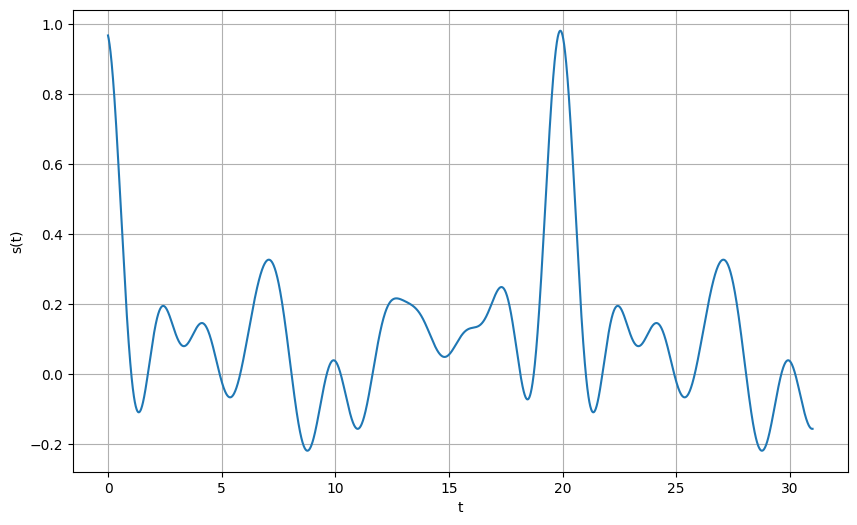

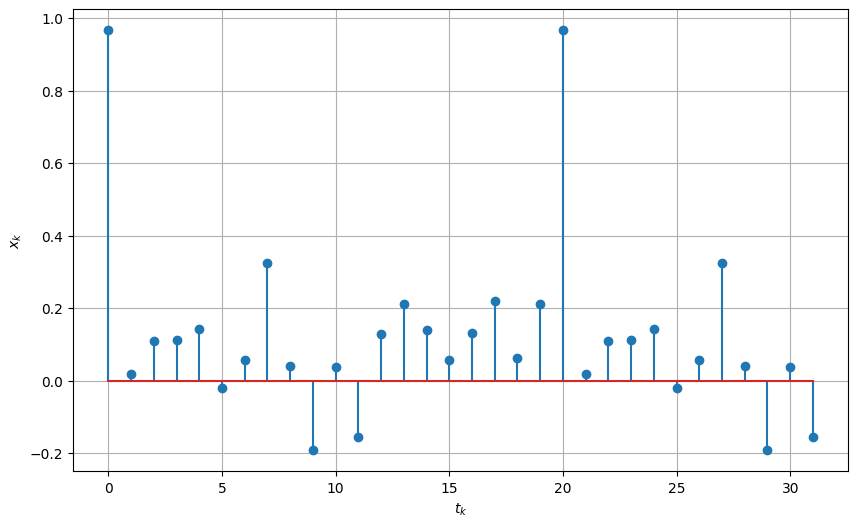

In [5]:
t_analog = np.arange(0, N + 0.01, 0.01)
t_args = np.arange(0, N + T, T)
def s(t):
    r = 0
    for i in range(11):
        r += A_k[i] * math.cos(w_k[i] * t + fi_k[i])
    return r
plt.figure(figsize=(10, 6))
plt.plot(t_analog, [s(t) for t in t_analog])
plt.ylabel("s(t)")
plt.xlabel("t")
plt.grid()

plt.show()
plt.figure(figsize=(10, 6))
plt.stem(t_args, [s(t) for t in t_args])
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.grid()
plt.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

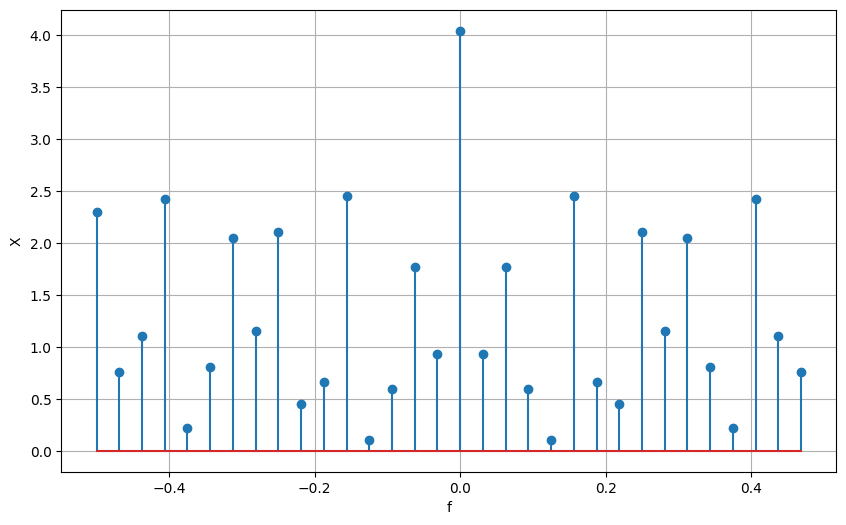

In [10]:
def dft(x): # дискретное преобразование Фурье
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

f_values = fftfreq(N + 1, T) # разложение в спектр
X_values = np.abs(dft([s(t) for t in t_args]))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values)
plt.ylabel("X")
plt.xlabel("f")
plt.grid()
plt.show()

Как можно заметить по графику выше, наблюдается симметрия относительно точки 0. Спектр имеет периодичность с шагом 1, а сам он представлен разложением исходного сигнала на лийненую комбинацию простых синусоидальных функций. Также он отражает амплитуды данных функций на различных частотах.

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.
Формулы для линейного сглаживания по 5 и 9 точкам:
$$y_{n,5}=\frac{1}{5} \sum_{k=-2}^{2} x_{n+k}$$
$$y_{n,9}=\frac{1}{9} \sum_{k=-4}^{4} x_{n+k}$$
Передаточные функции для линейного сглаживания по 5-ти и 9-ти точкам:
$$H_5(\omega)=\frac{1}{5}(1 + 2cos(\omega)+2cos(2\omega))$$
$$H_9(\omega)=\frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$$

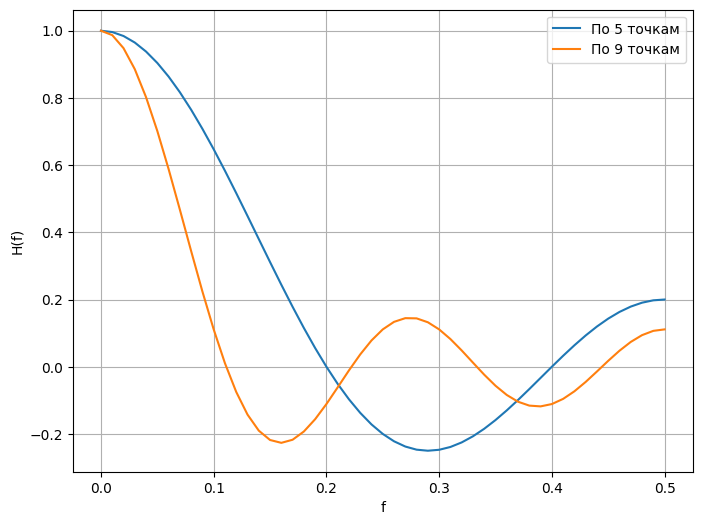

In [17]:
def h_5(f):
 return (1 + 2*math.cos(2*math.pi * f) + 2*math.cos(4*math.pi*f)) / 5
def h_9(f):
 return (1 + 2*math.cos(2*math.pi * f) + 2*math.cos(4*math.pi*f) + 2 * math.cos(6*math.pi*f) + 2*math.cos(8*math.pi*f)) / 9

f_values_for_h = np.arange(0, 0.5 + 0.01, 0.01)
plt.figure(figsize=(8, 6))
plt.plot(f_values_for_h, [h_5(f) for f in f_values_for_h], label="По 5 точкам")
plt.plot(f_values_for_h, [h_9(f) for f in f_values_for_h], label="По 9 точкам")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

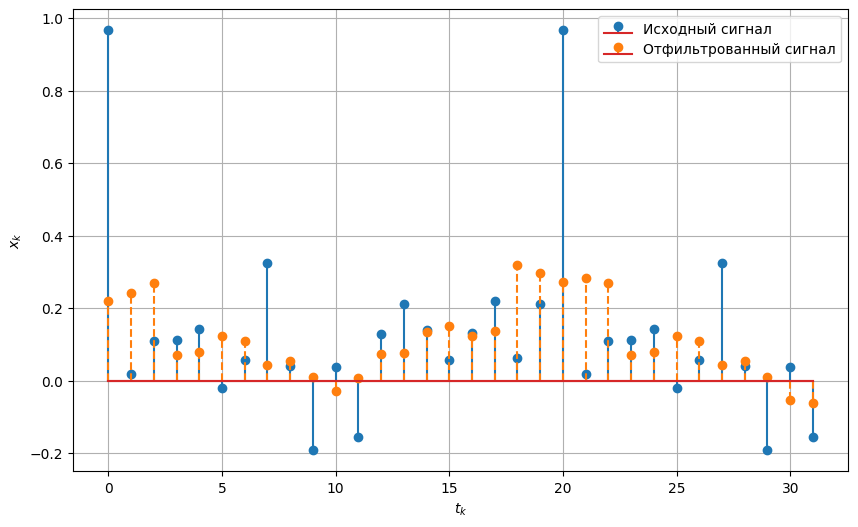

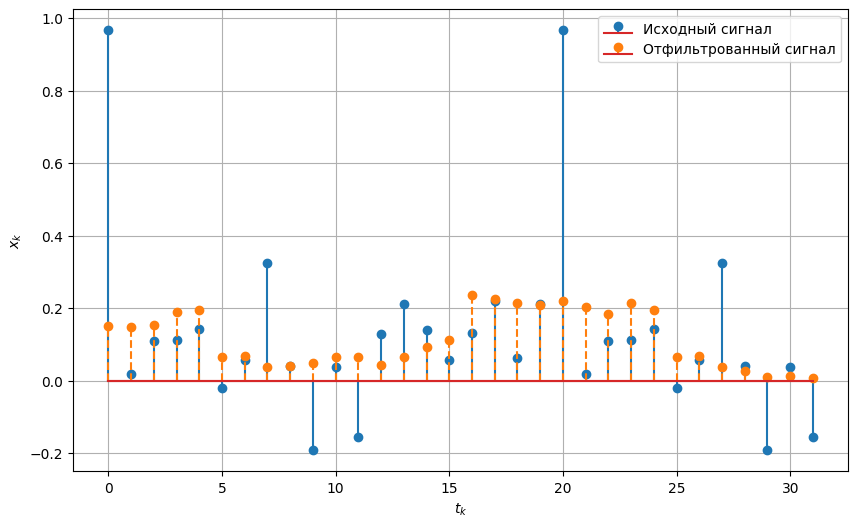

In [18]:
x_values = [s(t) for t in t_args]
x_values_5 = np.convolve(x_values, np.ones(5), 'same') / 5
x_values_9 = np.convolve(x_values, np.ones(9), 'same') / 9

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_5, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_9, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

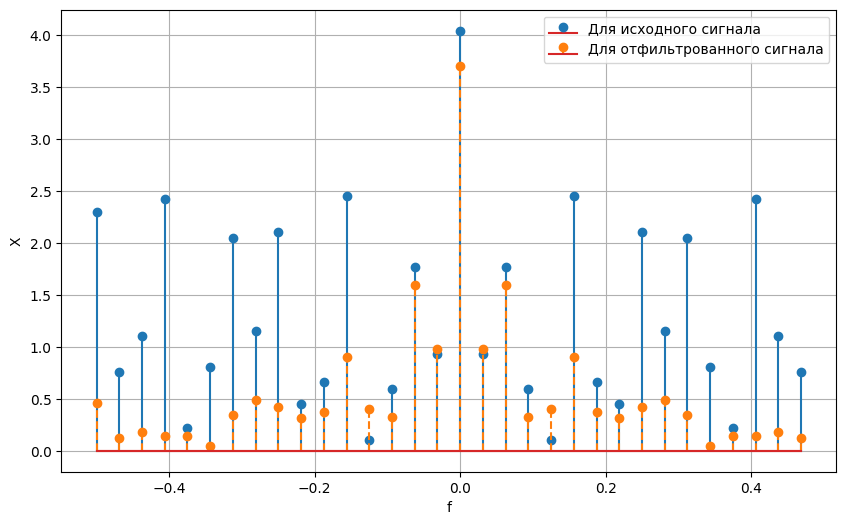

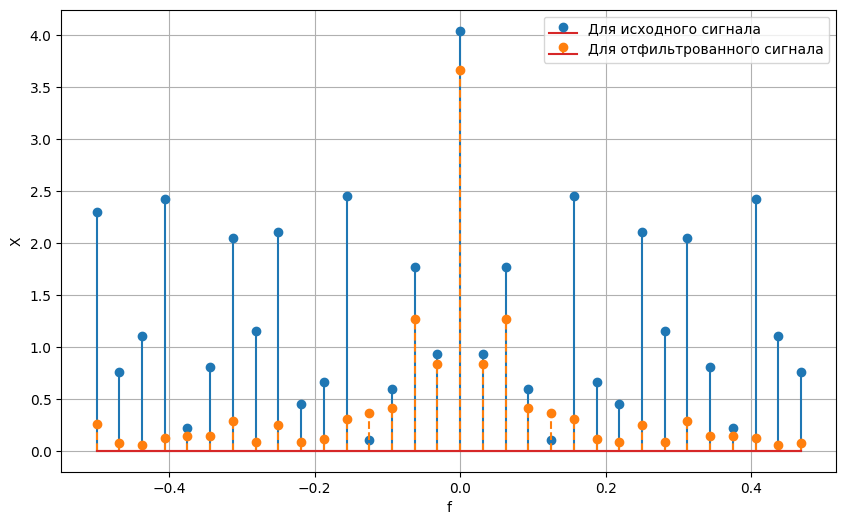

In [20]:
f_values = fftfreq(N + 1, T)
X_values_5 = np.abs(dft(x_values_5))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_5, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

f_values = fftfreq(N + 1, T)
X_values_9 = np.abs(dft(x_values_9))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_9, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Исходя из полученных результатов по спектру можно сделать вывод, что пропуск сигнала происходит без ослабления только при условии, что сигнал имеет постоянный уровень. Ослабевание сигналов, имеющих частоты около 0, происходит не так сильно, а сигналы с большими частотами заметно ослабевают. При увеличении числа точек полоса пропускания становится меньше.

#### 8. Повторить п. 4–7 для следующих фильтров:
##### a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
##### b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

**а. Фильтр сглаживания полиномом 2-ой степени по 5 и 9 узлам.**

Формулы для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$y_{n,5} = \frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$
$$y_{n,9} = \frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$
Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_5(\omega)=\frac{17+24cos(\omega)-6cos(2\omega)}{35}$$
$$H_9(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

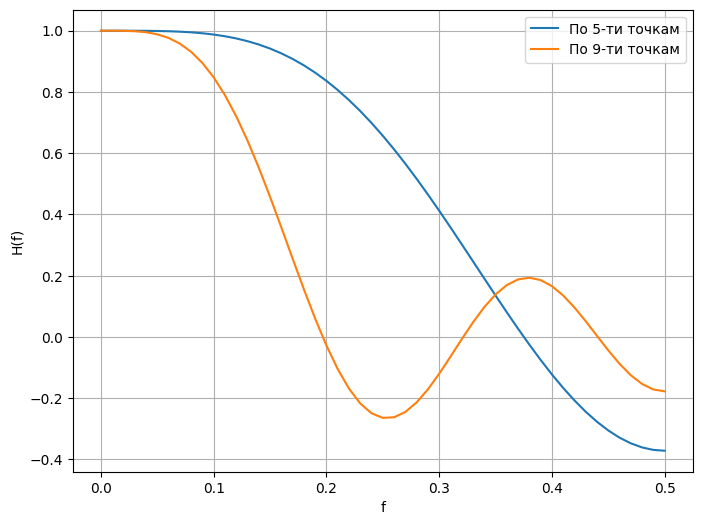

In [24]:
def h_5(f):
 return (17 + 24 * math.cos(2 * math.pi * f) - 6 * math.cos(2 * 2 * math.pi * f)) / 35
def h_9(f):
 return (59 + 108 * math.cos(2 * math.pi * f) + 78 * math.cos(2 * 2 * math.pi * f) + 28 * math.cos(3 * 2 * math.pi * f) - 42 * math.cos(4 * 2 * math.pi * f)) / 231
f_values_h = np.arange(0, 0.5 + 0.01, 0.01)
plt.figure(figsize=(8, 6))
plt.plot(f_values_h, [h_5(f) for f in f_values_for_h], label="По 5-ти точкам")
plt.plot(f_values_h, [h_9(f) for f in f_values_for_h], label="По 9-ти точкам")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

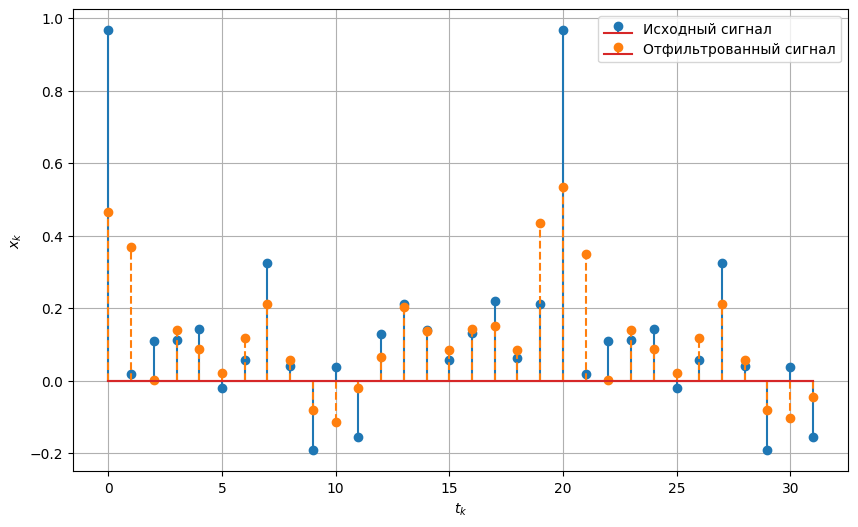

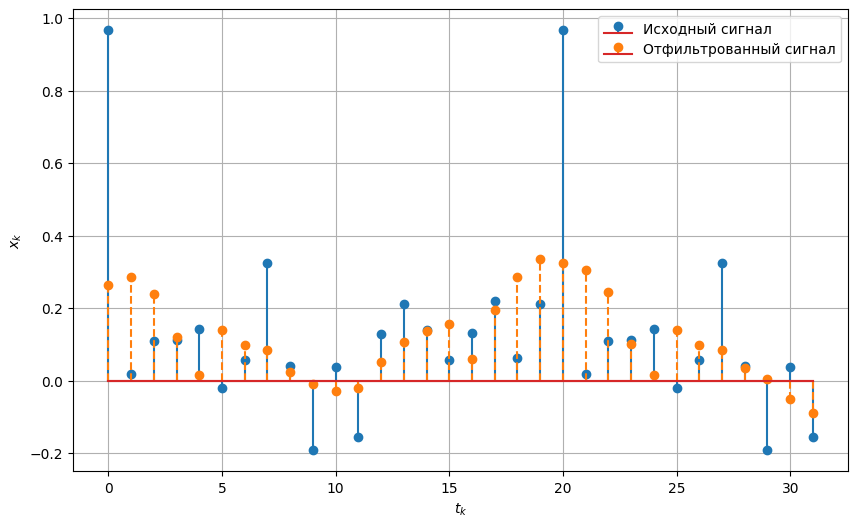

In [27]:
x_values = [s(t) for t in t_args]
x_values_5 = np.convolve(x_values, np.array([-3, 12, 17, 12, -3]), 'same') / 35
x_values_9 = np.convolve(x_values, np.array([-21, 14, 39, 54, 59, 54, 39, 14, - 21]), 'same') / 231

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_5, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_9, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

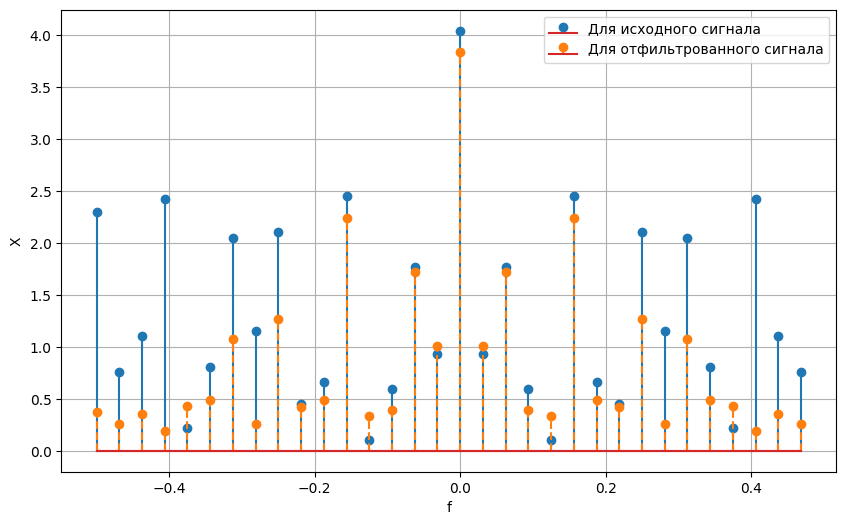

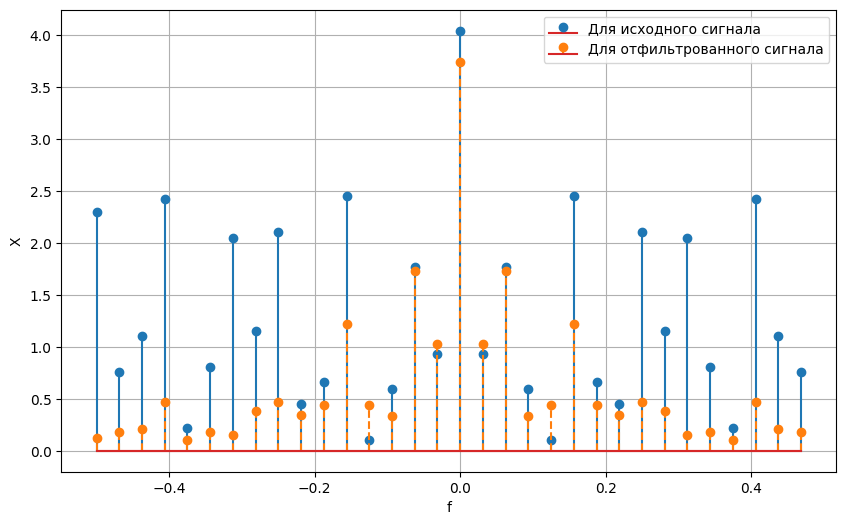

In [28]:
f_values = fftfreq(N + 1, T)
X_values_5 = np.abs(dft(x_values_5))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_5, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

f_values = fftfreq(N + 1, T)
X_values_9 = np.abs(dft(x_values_9))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_9, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

По графикам передаточных функций можно сделать следующие выводы:
1) При увеличении числа точек наблюдается прямая зависимость с крутизной среза - при увеличении одного параметра увеличивается и другой. Полоса пропускания частот имеет обратную зависимость с описанными выше параметрами.
2) В отличие от линейного фильтра, можно наблюдать более продолговатую часть в полосе пропускания в значениях частоты около 0. Следовательно, происходит малая потеря амплитуды при пропуске сигналов с низкой частотой в более широком диапазоне по сравнению с линейным фильтром.

**b. Фильтр сглаживания полиномом 4-ой степени по 7 и 11 узлам.**

Формулы для сглаживания полиномом четвёртой степени по 7-ти точкам и 11-ти точкам:
$$y_{n,7}=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+65x_{n+1}-30x_{n+2}+5x_{n+3})$$
$$y_{n,11}=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}+10x_{n+3}-45x_{n+4}+18x_{n+5})$$
Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_5(\omega)=\frac{131+150cos(\omega)-60cos(2\omega)+10cos(3\omega)}{231}$$
$$H_9(\omega)=\frac{143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega)}{429}$$

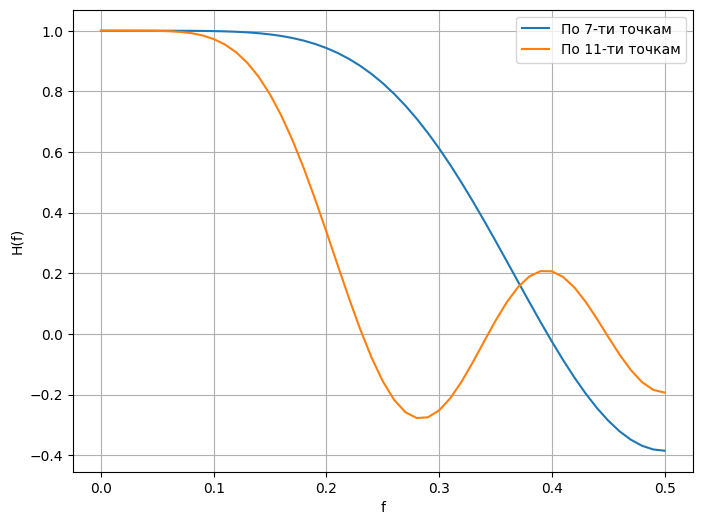

In [30]:
def h_7(f):
    return (131 + 150 * math.cos(2 * math.pi * f) - 60 * math.cos(2 * 2 * math.pi * f) + 10 * math.cos(3 * 2 * math.pi * f)) / 231
def h_11(f):
    return (143 + 240 * math.cos(2 * math.pi * f) + 120 * math.cos(2 * 2 * math.pi * f) - 20 * math.cos(3 * 2 * math.pi * f) - 90 * math.cos(4 * 2 * math.pi * f) + 36 * math.cos(5 * 2 * math.pi * f)) / 429

f_values_h = np.arange(0, 0.5 + 0.01, 0.01)

plt.figure(figsize=(8, 6))
plt.plot(f_values_h, [h_7(f) for f in f_values_for_h], label="По 7-ти точкам")
plt.plot(f_values_h, [h_11(f) for f in f_values_for_h], label="По 11-ти точкам")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

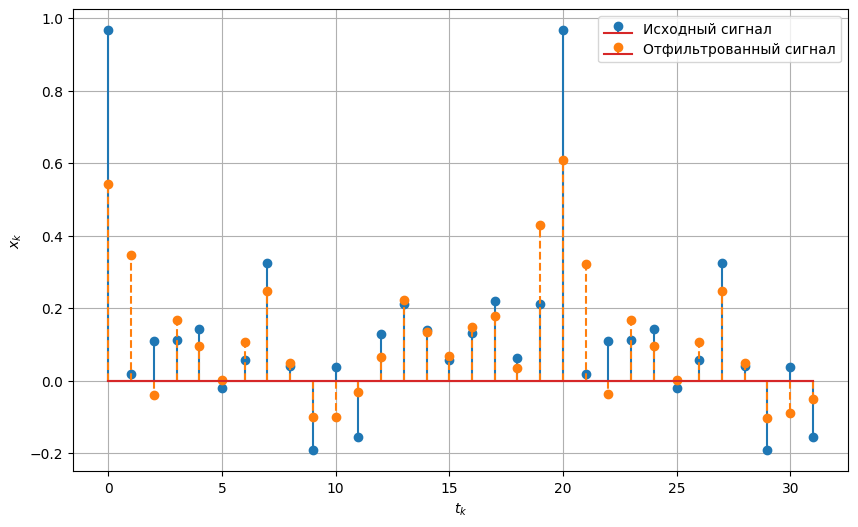

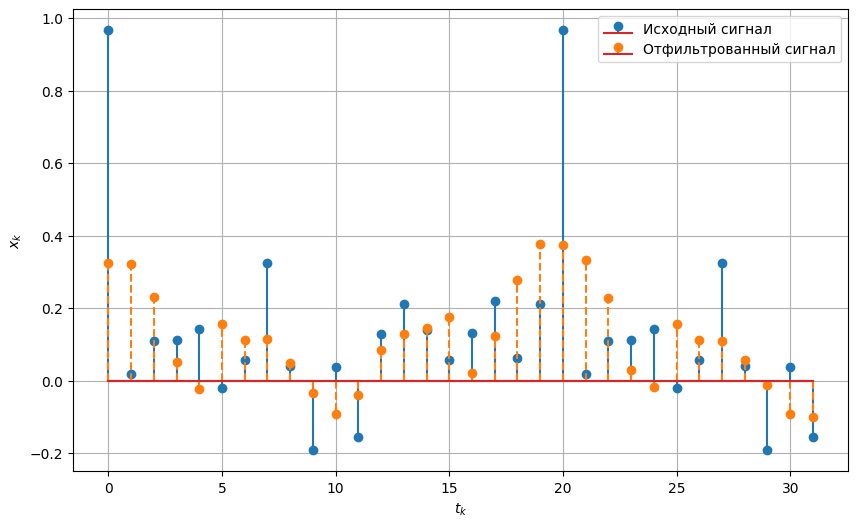

In [34]:
x_values = [s(t) for t in t_args]
x_values_7 = np.convolve(x_values, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
x_values_11 = np.convolve(x_values, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_7, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_values, label="Исходный сигнал")
plt.stem(t_args, x_values_11, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

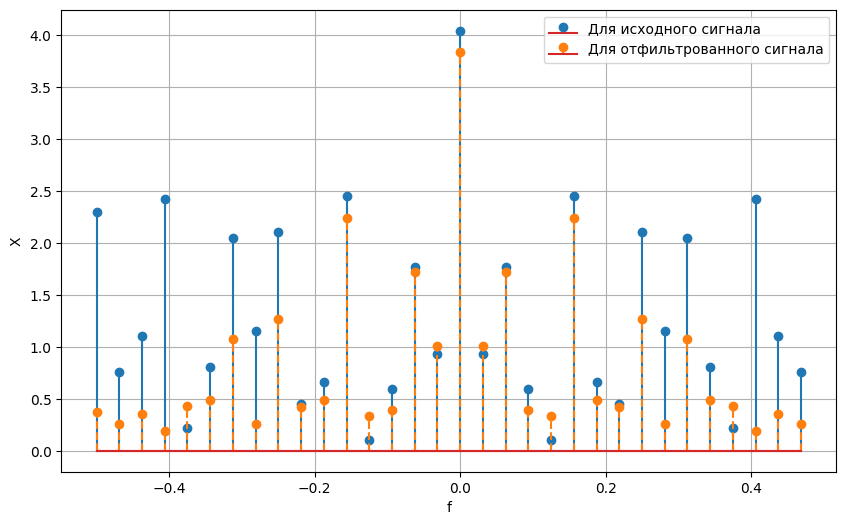

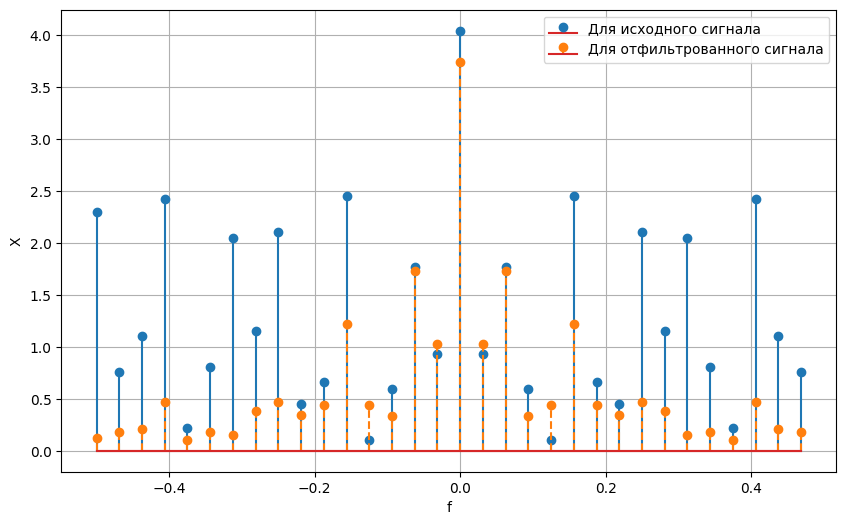

In [36]:
f_values = fftfreq(N + 1, T)
X_values_7 = np.abs(dft(x_values_7))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_5, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

f_values = fftfreq(N + 1, T)
X_values_11 = np.abs(dft(x_values_11))

plt.figure(figsize=(10, 6))
plt.stem(f_values, X_values, label="Для исходного сигнала")
plt.stem(f_values, X_values_9, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

По графикам передаточных функций можнол сделать следующие выводы:
1) При увеличении числа точек наблюдается обратная зависимость с полосой пропускания частот - она уменьшается. Данные передаточные функции схожи с теми, которые были получены при применении полинома второй степени, однако полоса пропускания стала еще шире.
2) В отличие от линейного фильтра, можно наблюдать более продолговатую часть в полосе пропускания в значениях частоты около 0. Следовательно, происходит малая потеря амплитуды при пропуске сигналов с низкой частотой в более широком диапазоне по сравнению с линейным фильтром.

## Выводы

В результате выполнения практической работы с помощью полиноминальных фильтров производилась фильтрация дискретных последовательностей. Помимо этого, был произведен анализ получаемых результатов, основываясь на ДПФ - дискретном преобразовании Фурье. В ходе работы был сгенерирован аналоговый сигнал, далее он был дискретизирован с шагом T = 1. С помощью средств визуализации для такого сигнала было выполнено построение спектра. Спектр был представлен в виде набора дискретных отсчетов. В ходе практической работы было выяснено, что спектр показывает наличие в исходном сигнале множества различных частот. Также в ходе выполнения работы было выполнено линейное сглаживание по нескольким узлам(сглаживание полиномом 2-ой степени по 5 и 9 узлам и сглаживание полиномом 4-ой степени по 7 и 11 узлам), а также визуализация сигналов (исходного и отфильтрованного) и спектра с помощью графиков. Таким образом, используя спектр удалось определить зависимость: ширина полосы пропускания уменьшается, а число точек - увеличивается, при этом фильтры, рассматриваемые в работе, обеспечивают фильтрацию высоких частот.